In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
data=pd.read_csv("Credit Score Classification Dataset.csv")
df=data.copy()

In [2]:
df = df.rename(columns={'Age': 'yaş', 'Gender': 'cinsiyet', 'Income': 'gelir', 'Education': 'eğitim',
                       'Marital Status': 'medeni_hal', 'Number of Children': 'çocuk_sayısı','Home Ownership': 'ev_sahipliği', 'Credit Score': 'kredi_skor'})

In [3]:
df.head()

,yaş,cinsiyet,gelir,eğitim,medeni_hal,çocuk_sayısı,ev_sahipliği,kredi_skor
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   yaş           164 non-null    int64 
 1   cinsiyet      164 non-null    object
 2   gelir         164 non-null    int64 
 3   eğitim        164 non-null    object
 4   medeni_hal    164 non-null    object
 5   çocuk_sayısı  164 non-null    int64 
 6   ev_sahipliği  164 non-null    object
 7   kredi_skor    164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yaş,164.0,37.975610,8.477289,25.0,30.75,37.0,45.0,53.0
gelir,164.0,83765.243902,32457.306728,25000.0,57500.00,83750.0,105000.0,162500.0
çocuk_sayısı,164.0,0.652439,0.883346,0.0,0.00,0.0,1.0,3.0


In [6]:
df.shape

(164, 8)

In [7]:
df["cinsiyet"].value_counts()

Female    86
Male      78
Name: cinsiyet, dtype: int64

In [8]:
df["eğitim"].value_counts()

Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: eğitim, dtype: int64

In [9]:
from pandas.api.types import CategoricalDtype
df.eğitim = df.eğitim.astype(CategoricalDtype(ordered = True))#belirtilmiş olan dataframe içerisindeki tipini kategorik değişkene dönüştür
df.dtypes

yaş                int64
cinsiyet          object
gelir              int64
eğitim          category
medeni_hal        object
çocuk_sayısı       int64
ev_sahipliği      object
kredi_skor        object
dtype: object

In [10]:
egitim_kategoriler = ["Doctorate", "Master's Degree", "Bachelor's Degree", "Associate's Degree", "High School Diploma"]
egitim_kategoriler.reverse() #uygun şekilde yazıyoruz
df.eğitim = df.eğitim.astype(CategoricalDtype(categories = egitim_kategoriler, ordered = True))
df.eğitim.head(1)

0    Bachelor's Degree
Name: eğitim, dtype: category
Categories (5, object): ['High School Diploma' < 'Associate's Degree' < 'Bachelor's Degree' < 'Master's Degree' < 'Doctorate']

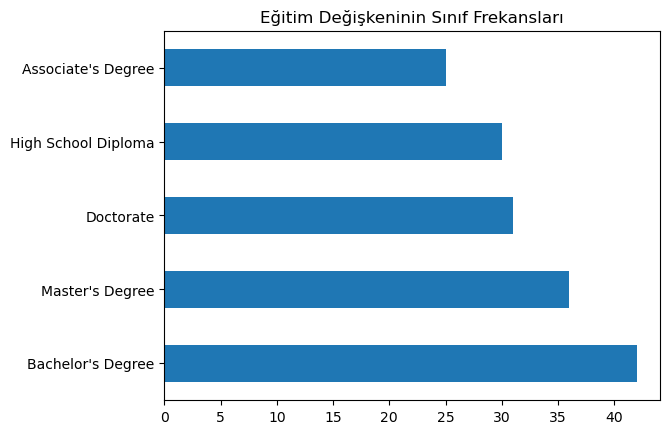

In [11]:
import matplotlib.pyplot as plt
df["eğitim"].value_counts().plot.barh().set_title("Eğitim Değişkeninin Sınıf Frekansları");

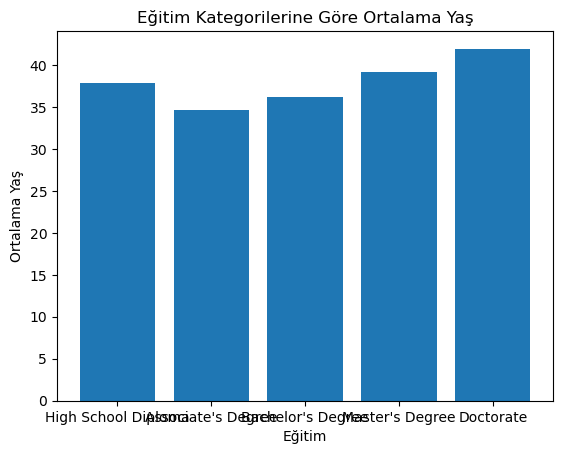

In [12]:
egitim_ortalama_yas = df.groupby('eğitim')['yaş'].mean().reset_index()
plt.bar(egitim_ortalama_yas['eğitim'], egitim_ortalama_yas['yaş'])
plt.xlabel('Eğitim')
plt.ylabel('Ortalama Yaş')
# Başlığı ayarlayın
plt.title('Eğitim Kategorilerine Göre Ortalama Yaş')
plt.show()

In [13]:
cınsıyet_gelır = df.groupby('cinsiyet')['gelir'].mean().reset_index()
cınsıyet_gelır

,cinsiyet,gelir
0,Female,68488.372093
1,Male,100608.974359


In [14]:
df.groupby('cinsiyet')['yaş'].mean().reset_index()

,cinsiyet,yaş
0,Female,36.081395
1,Male,40.064103


In [15]:
df.groupby('cinsiyet')['ev_sahipliği'].count().reset_index()

,cinsiyet,ev_sahipliği
0,Female,86
1,Male,78


In [16]:
df.groupby('cinsiyet')['kredi_skor'].value_counts()

cinsiyet  kredi_skor
Female    High          56
          Average       15
          Low           15
Male      High          57
          Average       21
Name: kredi_skor, dtype: int64

Text(0.5, 1.0, 'Eğitim ve Kredi Skoru Sınıf Frekansları')

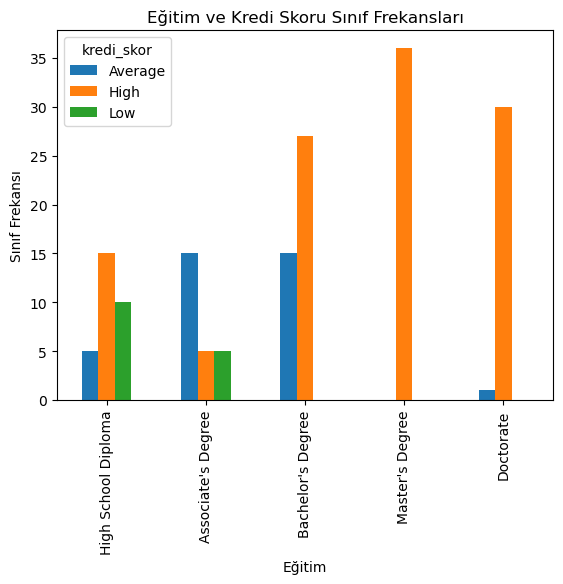

In [17]:
grouped_data=df.groupby('eğitim')['kredi_skor'].value_counts()
grouped_data.unstack().plot(kind='bar')
plt.xlabel('Eğitim')
plt.ylabel('Sınıf Frekansı')
plt.title('Eğitim ve Kredi Skoru Sınıf Frekansları')

Text(0.5, 1.0, 'Cinsiyet ve Kredi Skoru Sınıf Frekansları')

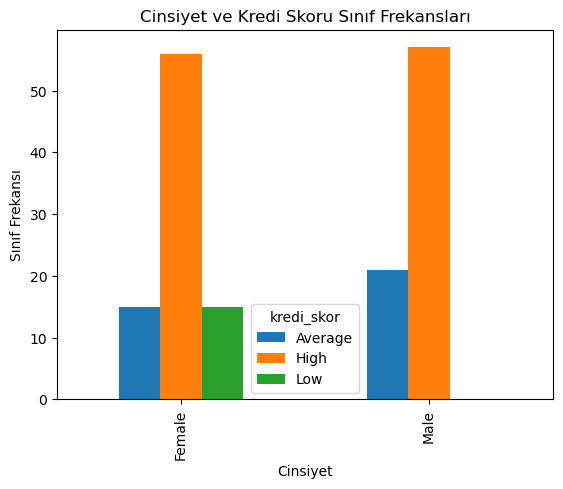

In [18]:
grouped_data=df.groupby('cinsiyet')['kredi_skor'].value_counts()
grouped_data.unstack().plot(kind='bar')
plt.xlabel('Cinsiyet')
plt.ylabel('Sınıf Frekansı')
plt.title('Cinsiyet ve Kredi Skoru Sınıf Frekansları')

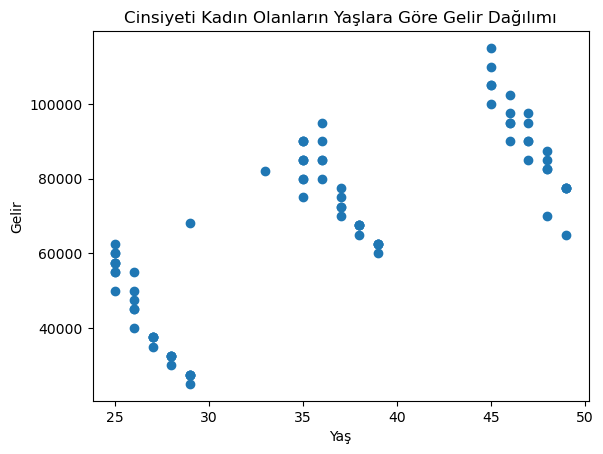

In [19]:
kadın_verileri = df[df['cinsiyet'] == 'Female']

# Gelir dağılımını görselleştirin
plt.scatter(kadın_verileri['yaş'], kadın_verileri['gelir'])

# Eksen etiketlerini ve başlığı ayarlayın
plt.xlabel('Yaş')
plt.ylabel('Gelir')
plt.title('Cinsiyeti Kadın Olanların Yaşlara Göre Gelir Dağılımı')

# Grafiği gösterin
plt.show()

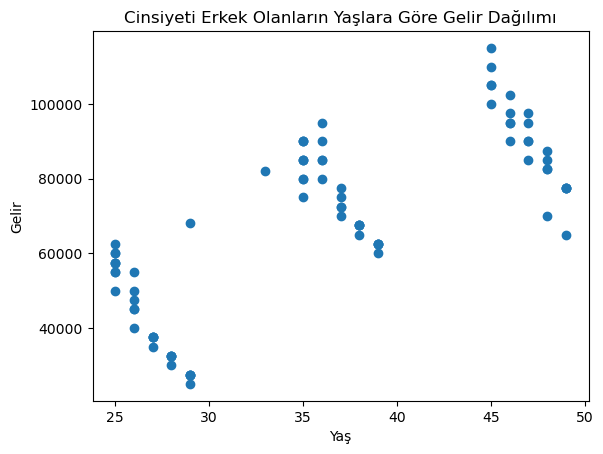

In [20]:
erkek_verileri = df[df['cinsiyet'] == 'Male']

# Gelir dağılımını görselleştirin
plt.scatter(kadın_verileri['yaş'], kadın_verileri['gelir'])

# Eksen etiketlerini ve başlığı ayarlayın
plt.xlabel('Yaş')
plt.ylabel('Gelir')
plt.title('Cinsiyeti Erkek Olanların Yaşlara Göre Gelir Dağılımı')

# Grafiği gösterin
plt.show()

<BarContainer object of 2 artists>

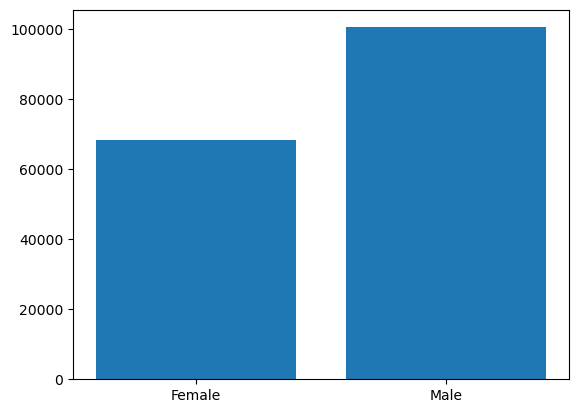

In [21]:
plt.bar(cınsıyet_gelır['cinsiyet'], cınsıyet_gelır['gelir'])

In [22]:
df.isnull().sum()

yaş             0
cinsiyet        0
gelir           0
eğitim          0
medeni_hal      0
çocuk_sayısı    0
ev_sahipliği    0
kredi_skor      0
dtype: int64

In [23]:
a=df[df['cinsiyet'] == 'Female']
a["yaş"]

0      25
2      35
4      45
6      26
8      36
       ..
155    38
157    48
159    29
161    39
163    49
Name: yaş, Length: 86, dtype: int64

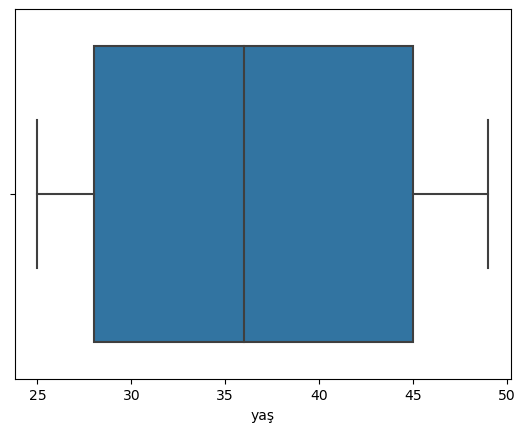

In [24]:
sns.boxplot(x = a["yaş"]);

In [25]:
b=df[df['cinsiyet'] == 'Single']
b["yaş"]

Series([], Name: yaş, dtype: int64)

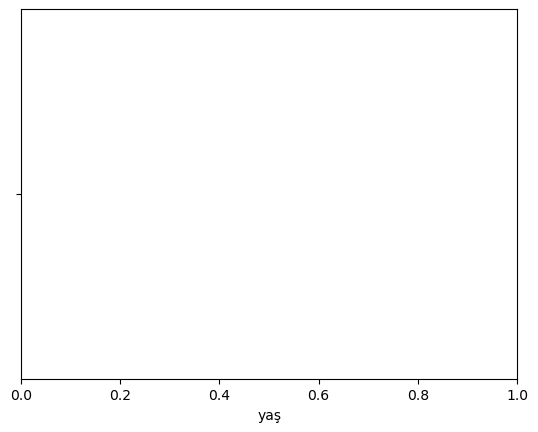

In [26]:
sns.boxplot(x = b["yaş"]);

In [29]:
df['gelir_sinifi'] = ['düşük' if gelir < 85000 else 'yüksek' for gelir in df['gelir']]

In [40]:
df['yaş_sinifi'] = ['genç' if gelir < 33 else 'yaşlı' for gelir in df['yaş']]

In [41]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesini oluşturun
label_encoder = LabelEncoder()
df['kredi_encoded'] = label_encoder.fit_transform(df['kredi_skor'])

In [42]:
df['medeni_encoded'] = label_encoder.fit_transform(df['medeni_hal'])

In [56]:
df['cinsiyet_encoded'] = label_encoder.fit_transform(df['cinsiyet'])

In [66]:
df['ev_encoded'] = label_encoder.fit_transform(df['ev_sahipliği'])

In [67]:
one_hot_encoded = pd.get_dummies(df['eğitim'], prefix='eğitim')

# Dönüştürülen sütunları veri setine ekleyin
df = pd.concat([df, one_hot_encoded], axis=1)

In [68]:
df.head()

,yaş,cinsiyet,gelir,eğitim,medeni_hal,çocuk_sayısı,ev_sahipliği,kredi_skor,gelir_sinifi,kredi_encoded,...,eğitim_Associate's Degree,eğitim_Bachelor's Degree,eğitim_Master's Degree,eğitim_Doctorate,ev_encoded,eğitim_High School Diploma,eğitim_Associate's Degree,eğitim_Bachelor's Degree,eğitim_Master's Degree,eğitim_Doctorate
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High,düşük,1,...,0,1,0,0,1,0,0,1,0,0
1,30,Male,100000,Master's Degree,Married,2,Owned,High,yüksek,1,...,0,0,1,0,0,0,0,0,1,0
2,35,Female,75000,Doctorate,Married,1,Owned,High,düşük,1,...,0,0,0,1,0,0,0,0,0,1
3,40,Male,125000,High School Diploma,Single,0,Owned,High,yüksek,1,...,0,0,0,0,0,1,0,0,0,0
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High,yüksek,1,...,0,1,0,0,0,0,0,1,0,0


<AxesSubplot:>

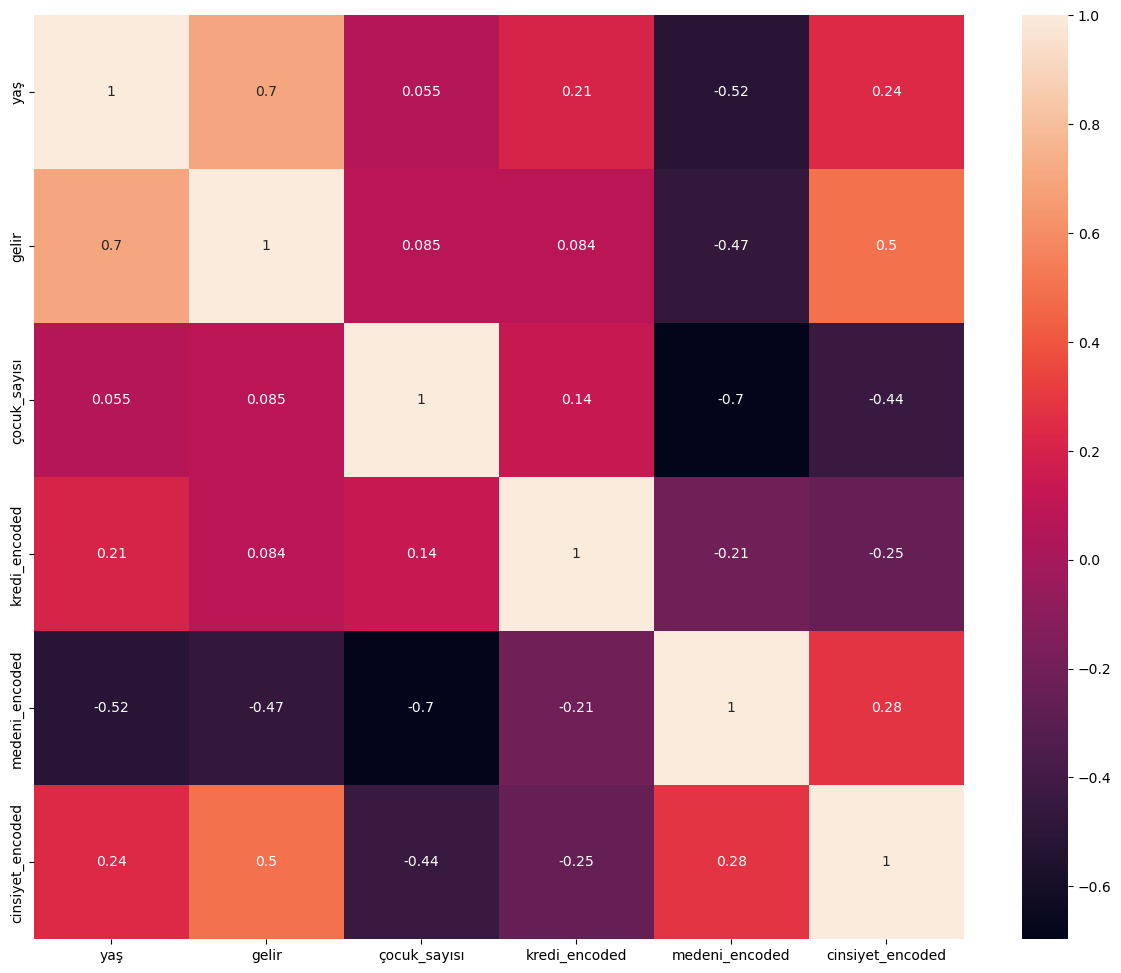

In [58]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Bağımsız değişkenlerin ve hedef değişkenin ayrılması
X = df[['yaş', 'medeni_encoded','cinsiyet_encoded','ev_encoded','gelir','eğitim_encoded']]  # Sadece kategorik değişkenler
y = df['kredi_skor']  # Hedef değişken

# Eğitim ve test veri setlerinin oluşturulması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Karar ağacı modelinin oluşturulması
model = DecisionTreeClassifier()

# Modelin eğitimi
model.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Modelin performansının değerlendirilmesi
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.9696969696969697
